In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

breast-cancer-wisconsin-data



In [2]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data = data.drop(["id", "Unnamed: 32"], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = data["diagnosis"]
X = data.drop(["diagnosis"], axis=1)

Number of Benign:  357
Number of Malignant:  212


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


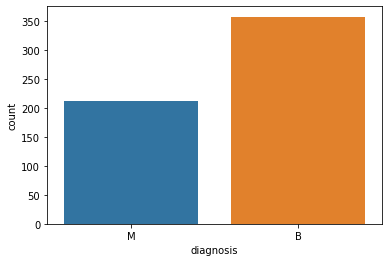

In [5]:
graph = sns.countplot(y, label="Count")
B, M = y.value_counts()

print("Number of Benign: ", B)
print("Number of Malignant: ", M)

In [6]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
print(data, data.shape)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")
data.head(10)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M     1.096100     -2.071512        1.268817   0.983510   
1           M     1.828212     -0.353322        1.684473   1.907030   
2           M     1.578499      0.455786        1.565126   1.557513   
3           M    -0.768233      0.253509       -0.592166  -0.763792   
4           M     1.748758     -1.150804        1.775011   1.824624   
..        ...          ...           ...             ...        ...   
564         M     2.109139      0.720838        2.058974   2.341795   
565         M     1.703356      2.083301        1.614511   1.722326   
566         M     0.701667      2.043775        0.672084   0.577445   
567         M     1.836725      2.334403        1.980781   1.733693   
568         B    -1.806811      1.220718       -1.812793  -1.346604   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.567087          3.280628        2.650542             2

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
5,M,radius_mean,-0.475956
6,M,radius_mean,1.169878
7,M,radius_mean,-0.118413
8,M,radius_mean,-0.319885
9,M,radius_mean,-0.473118


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

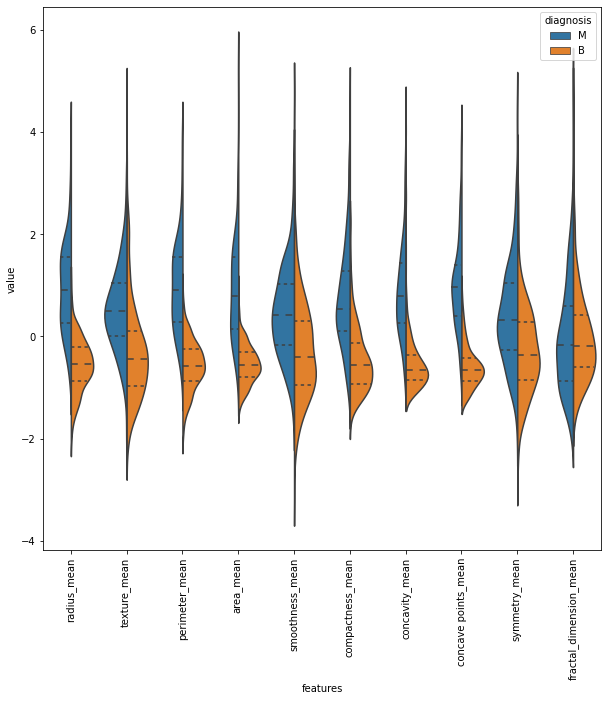

In [8]:
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [9]:
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis=1)
print(data.head(), data.shape)

  diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0         M      1.885031      -1.358098         2.301575    1.999478   
1         M      1.804340      -0.368879         1.533776    1.888827   
2         M      1.510541      -0.023953         1.346291    1.455004   
3         M     -0.281217       0.133866        -0.249720   -0.549538   
4         M      1.297434      -1.465481         1.337363    1.219651   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.306537           2.614365         2.107672              2.294058   
1         -0.375282          -0.430066        -0.146620              1.086129   
2          0.526944           1.081980         0.854222              1.953282   
3          3.391291           3.889975         1.987839              2.173873   
4          0.220362          -0.313119         0.612640              0.728618   

   symmetry_worst  fractal_dimension_worst  
0        2.748204            

In [10]:
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")
data.head()

,diagnosis,features,value
0,M,radius_worst,1.885031
1,M,radius_worst,1.804340
2,M,radius_worst,1.510541
3,M,radius_worst,-0.281217
4,M,radius_worst,1.297434


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

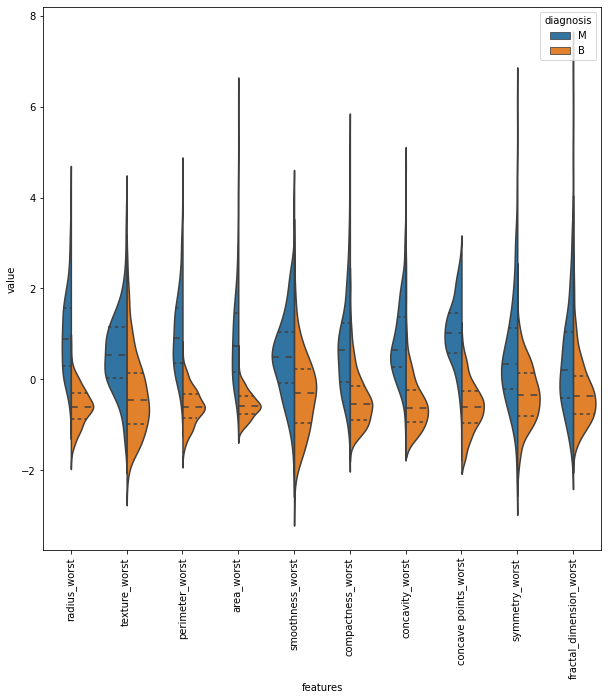

In [11]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=data, x="features", y="value", hue="diagnosis", split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

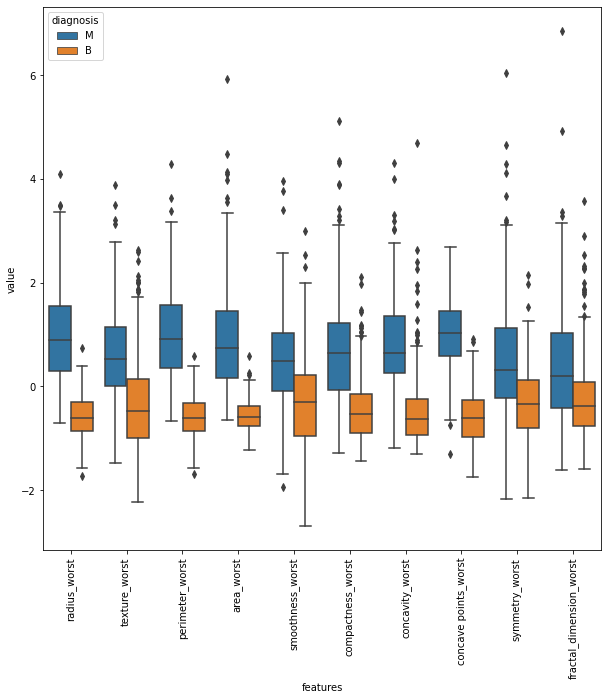

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)

<Figure size 1080x1080 with 0 Axes>

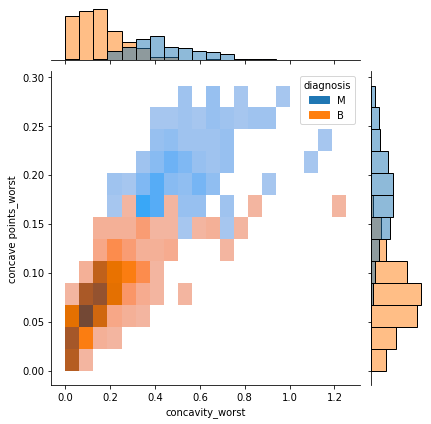

<Figure size 1080x1080 with 0 Axes>

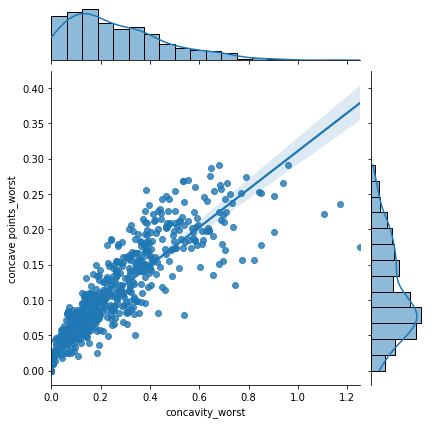

In [13]:
#kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
plt.figure(figsize=(15, 15))
sns.jointplot(x=X.loc[:,'concavity_worst'], y=X.loc[:,'concave points_worst'], kind="hist", color="#ce1414"\
              ,hue=y)

plt.figure(figsize=(15, 15))
sns.jointplot(x=X.concavity_worst, y=X["concave points_worst"], kind="reg")

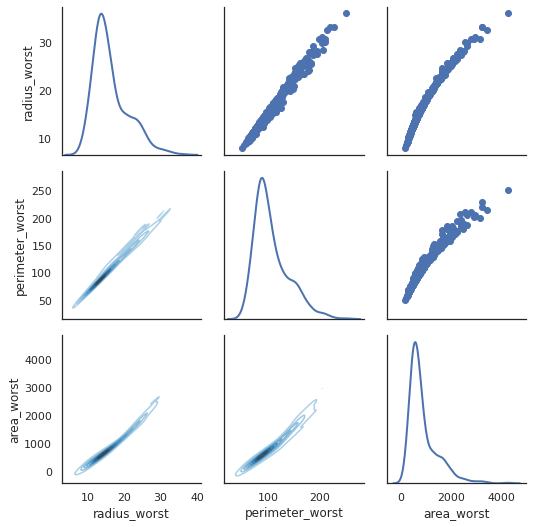

In [14]:
sns.set(style="white")
df = X[['radius_worst','perimeter_worst','area_worst']]

graph = sns.PairGrid(df, diag_sharey=False)\
        .map_lower(sns.kdeplot, cmap="Blues_d")\
        .map_upper(plt.scatter)\
        .map_diag(sns.kdeplot, lw=2)
#Upper means e upper triangle and the lower, the lower 

In [15]:
label = y
features = X

data_std = (features - features.mean()) / (features.std())

data = pd.concat([label, data_std.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

1625705678.4318407


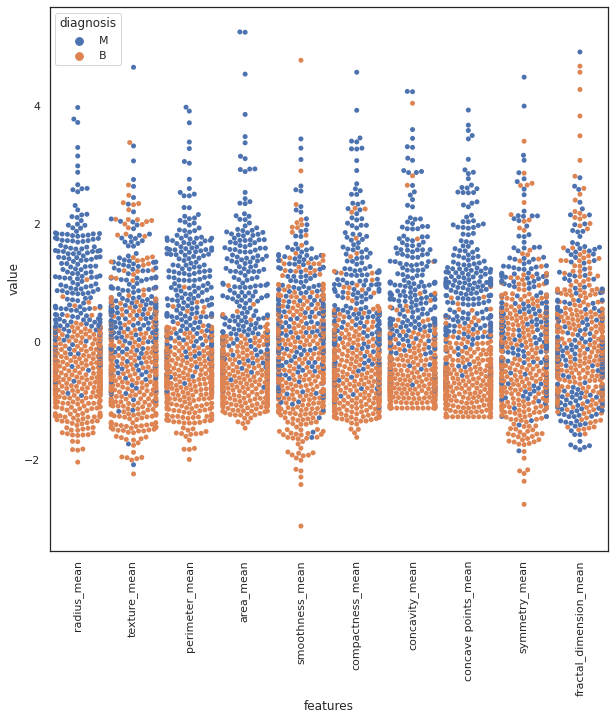

In [19]:
plt.figure(figsize=(10, 10))
tic = time.time()
sns.swarmplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)
print(tic)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

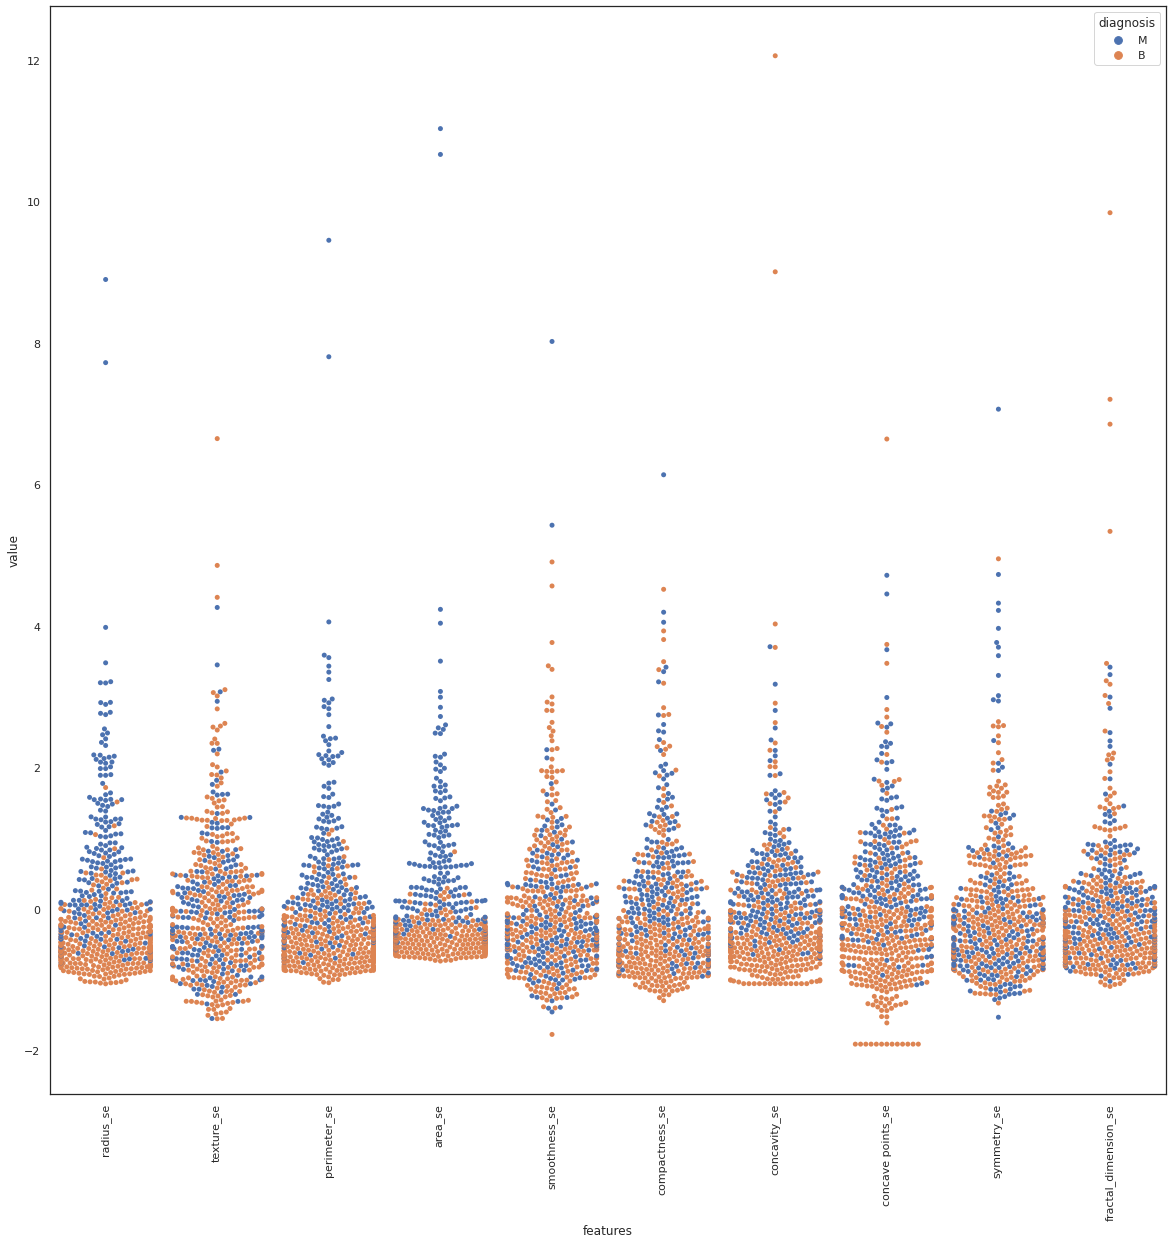

In [20]:
data = pd.concat([label, data_std.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(20, 20))
sns.swarmplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; y

1625706049.8750591


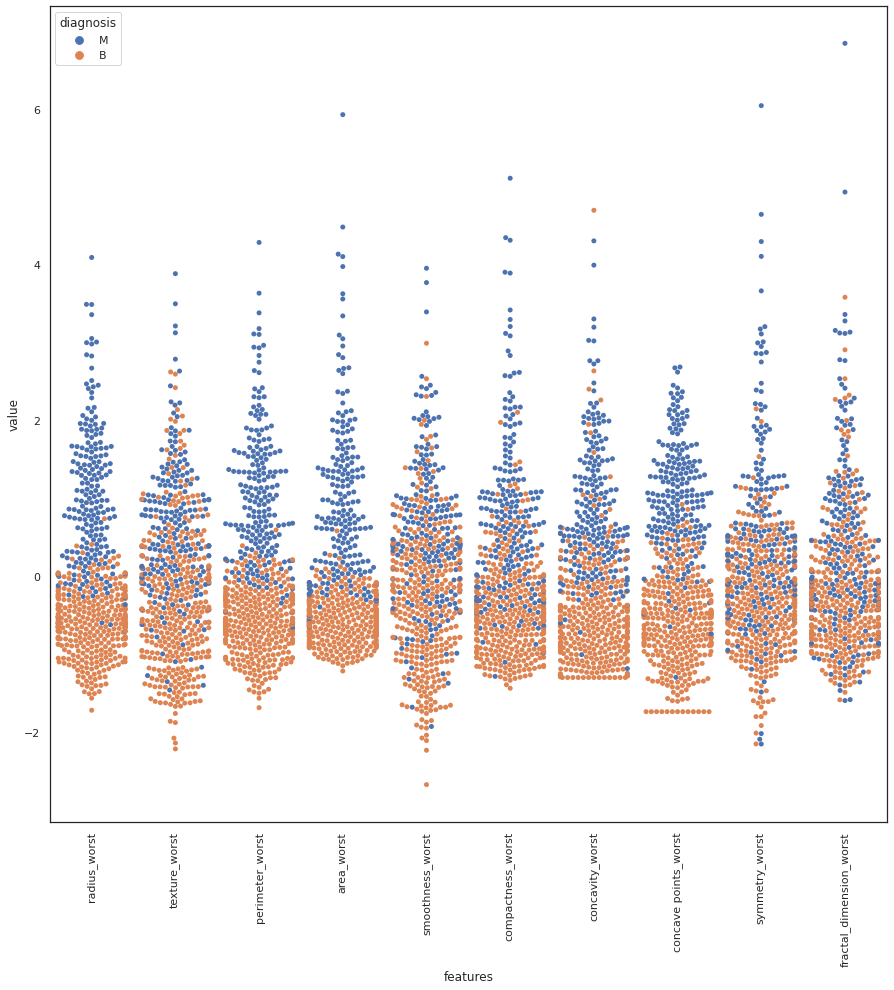

In [21]:
data = pd.concat([label, data_std.iloc[:, 20:31]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

t = time.time()

plt.figure(figsize=(15, 15))
sns.swarmplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)

print(t)

<AxesSubplot:>

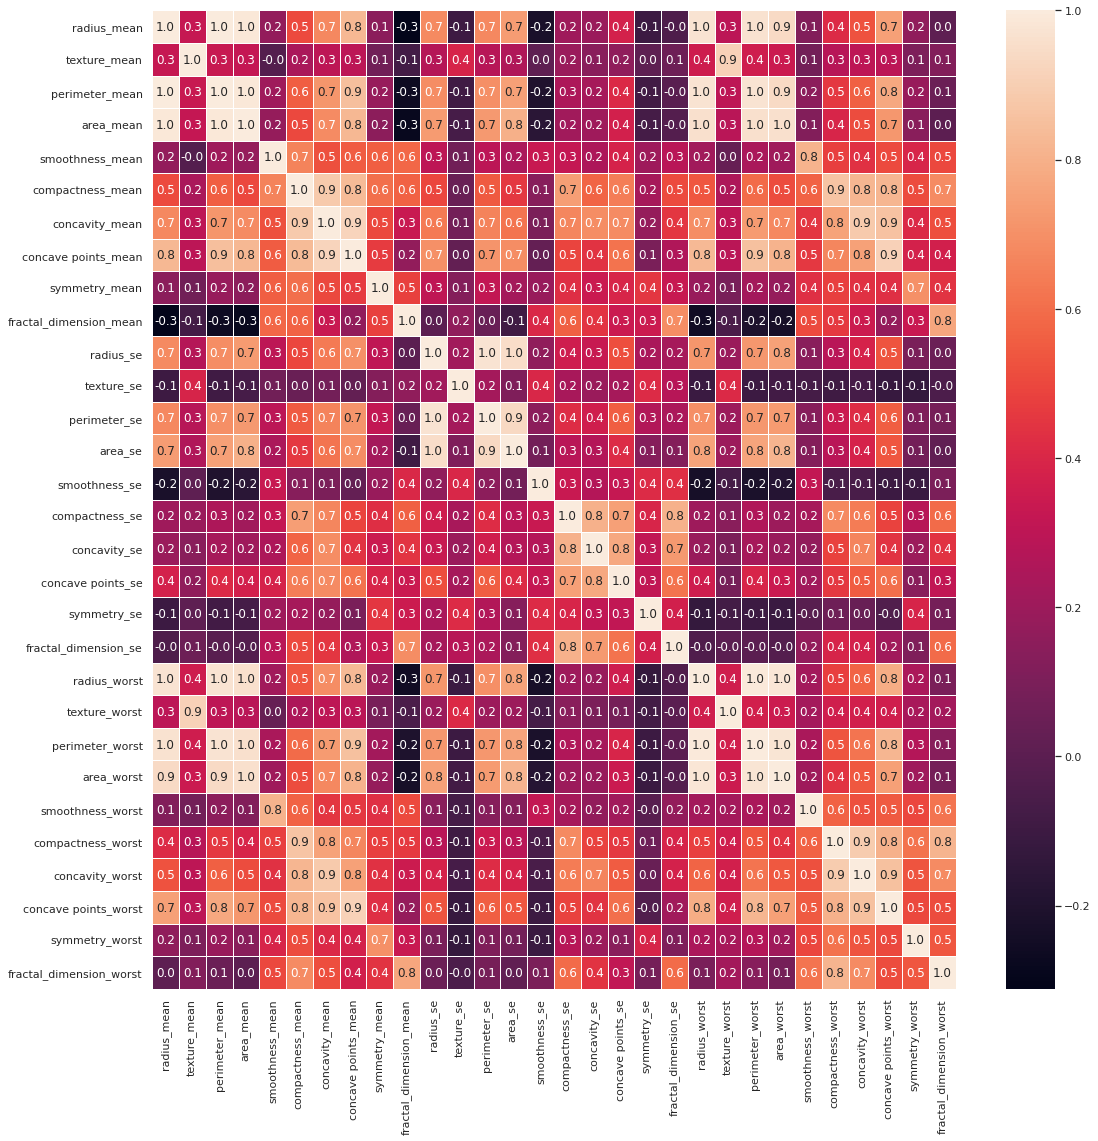

In [27]:
#correlation map

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)